In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
solar = pd.read_csv('solar_generation.csv',parse_dates=True)
wind = pd.read_csv('wind_generation.csv',parse_dates=True)

In [3]:
# Normalize data
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

solar_scaled = min_max_scaler.fit_transform(solar.iloc[:,1:].values)
norm_solar = pd.DataFrame(solar_scaled)

wind_scaled = min_max_scaler.fit_transform(wind.iloc[:,1:].values)
norm_wind = pd.DataFrame(wind_scaled)

# Equal width

In [4]:
from sklearn.preprocessing import KBinsDiscretizer

eq_w_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
eq_w_solar = eq_w_discretizer.fit_transform(solar.iloc[:,1:])
#eq_w_norm_solar = discretizer2.fit_transform(norm_solar.iloc[:,1:])
eq_w_wind = eq_w_discretizer.fit_transform(wind.iloc[:,1:])

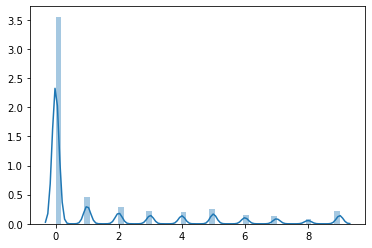

In [5]:
sns.distplot(eq_w_solar, norm_hist=False)

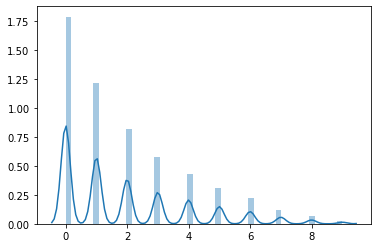

In [6]:
sns.distplot(eq_w_wind, norm_hist=False)

# Equal Frequency

In [7]:
from sklearn.preprocessing import KBinsDiscretizer

eq_f_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
eq_f_solar = eq_f_discretizer.fit_transform(solar.iloc[:,1:])
eq_f_wind = eq_f_discretizer.fit_transform(wind.iloc[:,1:])

/Users/elizastarr/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/Users/elizastarr/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/Users/elizastarr/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/Users/elizastarr/anaconda3/envs/datamining/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose wid

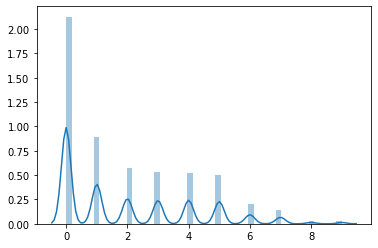

In [8]:
sns.distplot(eq_f_solar, norm_hist=False)

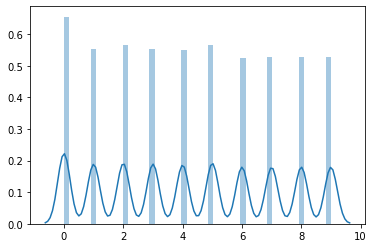

In [9]:
sns.distplot(eq_f_wind, norm_hist=False)

In [10]:
# Equal width
eq_w_wind_df = pd.DataFrame(eq_w_wind, columns=wind.columns[1:])
eq_w_wind_df.index = pd.to_datetime(wind['timestamp'])

eq_w_solar_df = pd.DataFrame(eq_w_solar, columns=solar.columns[1:])
eq_w_solar_df.index = pd.to_datetime(solar['timestamp'])

In [11]:
# Equal Freq
eq_f_wind_df = pd.DataFrame(eq_f_wind, columns=wind.columns[1:])
eq_f_wind_df.index = pd.to_datetime(wind['timestamp'])

eq_f_solar_df = pd.DataFrame(eq_f_solar, columns=solar.columns[1:])
eq_f_solar_df.index = pd.to_datetime(solar['timestamp'])

In [12]:
wind.index = pd.to_datetime(wind['timestamp'])
solar.index = pd.to_datetime(solar['timestamp'])

equal frequency looks better for wind

equal width looks better for solar

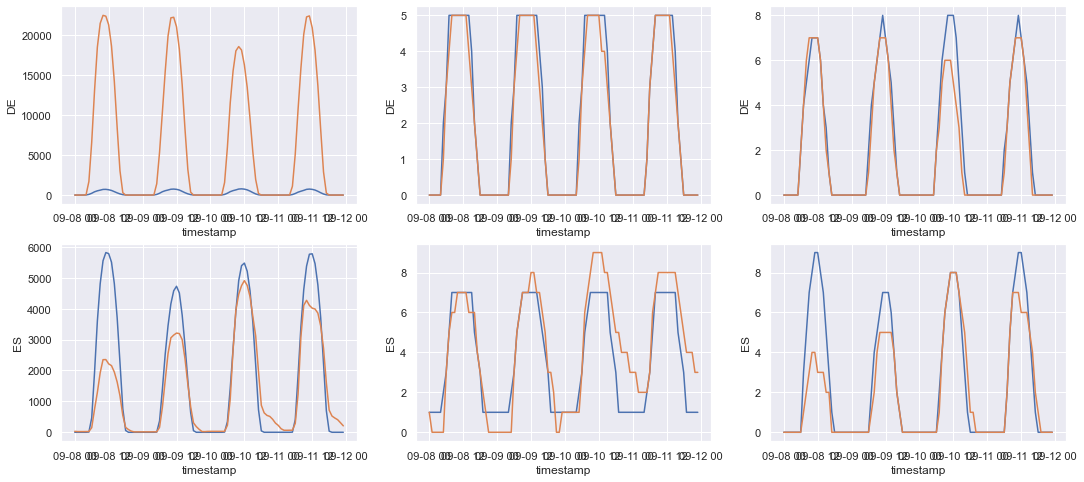

In [13]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib import pyplot

a4_dims = (18, 8)
fig, axs = pyplot.subplots(2,3,figsize=a4_dims, sharey=False)

date_range = solar['2018-09-08':'2018-09-11']
a1 = sns.lineplot(ax=axs[0,0], data=date_range,x=date_range.index,y='AT')

date_range = eq_f_solar_df['2018-09-08':'2018-09-11']
a2 = sns.lineplot(ax=axs[0,1], data=date_range,x=date_range.index,y='AT')

date_range = eq_w_solar_df['2018-09-08':'2018-09-11']
a3 = sns.lineplot(ax=axs[0,2], data=date_range,x=date_range.index,y='AT')

date_range = solar['2018-09-08':'2018-09-11']
a1 = sns.lineplot(ax=axs[0,0], data=date_range,x=date_range.index,y='DE')

date_range = eq_f_solar_df['2018-09-08':'2018-09-11']
a2 = sns.lineplot(ax=axs[0,1], data=date_range,x=date_range.index,y='DE')

date_range = eq_w_solar_df['2018-09-08':'2018-09-11']
a3 = sns.lineplot(ax=axs[0,2], data=date_range,x=date_range.index,y='DE')


date_range = solar['2018-09-08':'2018-09-11']
a1 = sns.lineplot(ax=axs[1,0], data=date_range,x=date_range.index,y='FR')

date_range = eq_f_solar_df['2018-09-08':'2018-09-11']
a2 = sns.lineplot(ax=axs[1,1], data=date_range,x=date_range.index,y='FR')

date_range = eq_w_solar_df['2018-09-08':'2018-09-11']
a3 = sns.lineplot(ax=axs[1,2], data=date_range,x=date_range.index,y='FR')

date_range = solar['2018-09-08':'2018-09-11']
a1 = sns.lineplot(ax=axs[1,0], data=date_range,x=date_range.index,y='ES')

date_range = eq_f_solar_df['2018-09-08':'2018-09-11']
a2 = sns.lineplot(ax=axs[1,1], data=date_range,x=date_range.index,y='ES')

date_range = eq_w_solar_df['2018-09-08':'2018-09-11']
a3 = sns.lineplot(ax=axs[1,2], data=date_range,x=date_range.index,y='ES')

# limit columns and rows

In [14]:
eq_f_wind_df_sampled = eq_f_wind_df.loc['2015-01-01':'2019-01-01',['AT', 'BG', 'CZ', 'DE', 'DK', 'EE', 'ES', 'HU',
       'LT', 'LV', 'PL', 'PT', 'RO']]
eq_w_solar_df_sampled = eq_w_solar_df.loc['2015-01-01':'2019-01-01',['AT', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'ES', 'FR', 'GR',
       'NL', 'PT', 'RO', 'GB']]

In [24]:
solar.columns

Index(['timestamp', 'AT', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FR',
       'GR', 'LT', 'NL', 'PT', 'RO', 'SE', 'SI', 'SK', 'GB'],
      dtype='object')

In [26]:
solar_continuous_13country_1years = solar.loc['2018-01-01':'2019-01-01',['AT', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'ES', 'FR', 'GR',
       'NL', 'PT', 'RO', 'GB']]
solar_continuous_13country_2years = solar.loc['2017-01-01':'2019-01-01',['AT', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'ES', 'FR', 'GR',
       'NL', 'PT', 'RO', 'GB']]
solar_continuous_13country_3years = solar.loc['2016-01-01':'2019-01-01',['AT', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'ES', 'FR', 'GR',
       'NL', 'PT', 'RO', 'GB']]
solar_continuous_13country_4years = solar.loc['2015-01-01':'2019-01-01',['AT', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'ES', 'FR', 'GR',
       'NL', 'PT', 'RO', 'GB']]

# Save csvs

In [15]:
eq_f_wind_df_sampled.to_csv('sampled_discretized_data/equal_frequency_wind_sampled.csv', float_format='%.1f',date_format='%Y-%m-%dT%H:%M:%SZ')
eq_w_solar_df_sampled.to_csv('sampled_discretized_data/equal_width_solar_sampled.csv', float_format='%.1f',date_format='%Y-%m-%dT%H:%M:%SZ')

In [16]:
eq_f_wind_df.to_csv('discretized_data/equal_frequency_wind.csv', float_format='%.1f',date_format='%Y-%m-%dT%H:%M:%SZ')
eq_w_solar_df.to_csv('discretized_data/equal_width_solar.csv', float_format='%.1f',date_format='%Y-%m-%dT%H:%M:%SZ')

In [33]:
solar_continuous_13country_1years.to_csv('continuous_data/solar_continuous_13country_1years.csv', float_format='%.1f',date_format='%Y-%m-%dT%H:%M:%SZ')
solar_continuous_13country_2years.to_csv('continuous_data/solar_continuous_13country_2years.csv', float_format='%.1f',date_format='%Y-%m-%dT%H:%M:%SZ')
solar_continuous_13country_3years.to_csv('continuous_data/solar_continuous_13country_3years.csv', float_format='%.1f',date_format='%Y-%m-%dT%H:%M:%SZ')
solar_continuous_13country_4years.to_csv('continuous_data/solar_continuous_13country_4years.csv', float_format='%.1f',date_format='%Y-%m-%dT%H:%M:%SZ')

FileNotFoundError: [Errno 2] No such file or directory: 'continuous_data/solar_continuous_13country_1years.csv'

# Results

In [127]:
w5 = pd.read_excel('resultsp543.xlsx',sheet_name='wind,p5', header=None)[:10]
s5 = pd.read_excel('resultsp543.xlsx',sheet_name='solar,p5', header=None)[:10]
w4 = pd.read_excel('resultsp543.xlsx',sheet_name='wind,p4', header=None)[:10]
s4 = pd.read_excel('resultsp543.xlsx',sheet_name='solar,p4', header=None)[:10]
w3 = pd.read_excel('resultsp543.xlsx',sheet_name='wind,p3', header=None)[:10]
s3 = pd.read_excel('resultsp543.xlsx',sheet_name='solar,p3', header=None)[:10]

In [178]:
def most_freq(df):
    df_list = np.reshape(df.iloc[:,:-1].values, (df.iloc[:,:-1].values.shape[0]*df.iloc[:,:-1].values.shape[1]))
    unique, freq = np.unique(df_list, return_counts=True)
    df = pd.DataFrame([unique,freq]).T
    df.columns = ['country','frequency']
    return df.sort_values(by='frequency', ascending=False)

In [180]:
for df in [w5,s5,w4,s4,w3,s3]:
    print(most_freq(df))

     country frequency
4    Germany        10
8     Poland         9
1    Czechia         8
2    Denmark         7
6     Latvia         5
7  Lithuania         5
0    Austria         3
3    Estonia         2
5    Hungary         1
          country frequency
3         Czechia         8
10        Germany         8
0         Austria         7
1         Belgium         5
7         Romaina         5
2        Bulgaria         4
5          France         3
11  Great Britain         3
12         Greece         3
4         Denmark         1
6        Portugal         1
8           Spain         1
9         Austria         1
   country frequency
7       PL         9
1       CZ         5
3       DK         5
10      LT         5
6       LV         4
8       DE         4
2       DE         3
0       AT         2
4       HU         1
5       LT         1
9       EE         1
   country frequency
10      DE         8
0       AT         6
3       CZ         6
1       BE         5
2       BG         3


In [182]:
for df in [w5,s5,w4,s4,w3,s3]:
    print(df)

           0        1        2        3        4        5
0  Lithuania  Germany   Poland  Czechia  Denmark  6.23494
1    Germany   Latvia   Poland  Denmark  Czechia  6.19706
2  Lithuania  Germany  Austria   Poland  Czechia  6.19121
3    Germany  Austria   Poland  Hungary  Czechia  6.17690
4    Germany  Austria   Poland  Czechia  Denmark  6.17003
5  Lithuania  Germany   Latvia   Poland  Czechia  6.15608
6  Lithuania  Germany   Latvia   Poland  Denmark  6.13326
7    Estonia  Germany   Poland  Czechia  Denmark  6.11760
8  Lithuania  Germany   Latvia  Denmark  Czechia  6.11502
9    Estonia  Germany   Latvia   Poland  Denmark  6.11243
         0          1              2              3         4        5
0  Germany     Greece       Bulgaria        Romaina   Czechia  6.34028
1  Germany    Austria        Belgium        Denmark   Czechia  6.30533
2  Germany    Belgium        Austria         France   Czechia  6.30122
3  Germany    Austria       Bulgaria        Romaina   Czechia  6.28355
4  Germ